In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import cv2
import os
from IPython.display import Image, display
import numpy as np


C:\Users\Jonah\miniconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [52]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
img_size=(224,224)
img_channels=3
MODEL_NAME = "CatsOrDogsModel.keras"

In [4]:
Directory = os.listdir("./train/train")


labels=[]
for name in Directory:
    label = name.split('.')[0]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

df=pd.DataFrame({
    'filename':Directory,
    'label':labels
})


In [15]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Dropout,
    Flatten, Dense, BatchNormalization
)

inputs = Input(shape=(224, 224, 3))

x = Conv2D(64, (3,3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3,3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)


x = Conv2D(64, (3,3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3), activation='relu', name="last_conv")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ last_conv (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,419,522 (169.45 MB)

 Trainable params: 44,417,986 (169.44 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [17]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
earlystop = EarlyStopping(patience=10)

In [19]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001,
                                            mode='max')

In [20]:
callbacks = [earlystop, learning_rate_reduction]

In [21]:
df["label"] = df["label"].replace({0: 'cat', 1: 'dog'}) 

In [22]:
train_data, validation_data = train_test_split(df, test_size=0.20, random_state=42)
train_data = train_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)


In [23]:
final_train_data = train_data.shape[0]
final_validation_data = validation_data.shape[0]
batch_size=15

In [24]:
generate_train_data = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_gen = generate_train_data.flow_from_dataframe(train_data,
                                             "./train/train/",x_col='filename',y_col='label',
                                                 target_size=img_size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)


Found 20000 validated image filenames belonging to 2 classes.


In [25]:
generate_validation_data = ImageDataGenerator(rescale=1./255)
validation_gen = generate_validation_data.flow_from_dataframe(
    validation_data, 
    "./train/train/", 
    x_col='filename',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size
)


Found 5000 validated image filenames belonging to 2 classes.


In [26]:
epochs=10
history = model.fit(
    train_gen, 
    epochs=epochs,
    validation_data=validation_gen,
    validation_steps=final_validation_data//batch_size,
    steps_per_epoch=final_train_data//batch_size,
    callbacks=callbacks
)

Epoch 1/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 544s 407ms/step - accuracy: 0.6322 - loss: 0.7498 - val_accuracy: 0.6901 - val_loss: 0.6029 - learning_rate: 0.0010
Epoch 2/10


C:\Users\Jonah\miniconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:171: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


   1/1333 ━━━━━━━━━━━━━━━━━━━━ 6:16 283ms/step - accuracy: 0.7333 - loss: 0.4745

C:\Users\Jonah\miniconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7333 - loss: 0.4745 - val_accuracy: 0.6623 - val_loss: 0.6693 - learning_rate: 0.0010
Epoch 3/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 444s 333ms/step - accuracy: 0.7069 - loss: 0.5755 - val_accuracy: 0.7550 - val_loss: 0.5198 - learning_rate: 0.0010
Epoch 4/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7333 - loss: 0.5019 - val_accuracy: 0.7029 - val_loss: 0.5797 - learning_rate: 0.0010
Epoch 5/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 522s 391ms/step - accuracy: 0.7506 - loss: 0.5186 - val_accuracy: 0.7760 - val_loss: 0.4832 - learning_rate: 0.0010
Epoch 6/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.7333 - loss: 0.6482 - val_accuracy: 0.7622 - val_loss: 0.5432 - learning_rate: 0.0010
Epoch 7/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 833s 625ms/step - accuracy: 0.7768 - loss: 0.4771 - val_accuracy: 0.7457 - val_loss: 0.5272 - learning_rate: 0.0010
Epoch 8/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - accuracy: 0

In [27]:
model.save(MODEL_NAME)

In [28]:
test_filenames = os.listdir("./testSet/test1")
test_data = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_data.shape[0]


In [29]:
generate_test_data= ImageDataGenerator(rescale=1./255)
test_gen = generate_test_data.flow_from_dataframe(
    test_data, 
    "./testSet/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [30]:
prediction = model.predict(test_gen, steps=int(np.ceil(nb_samples/batch_size)))

834/834 ━━━━━━━━━━━━━━━━━━━━ 161s 193ms/step


In [31]:
test_data['label'] = np.argmax(prediction, axis=-1)

label_map = dict((v,k) for k,v in train_gen.class_indices.items())
test_data['label'] = test_data['label'].replace(label_map)

test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })


C:\Users\Jonah\AppData\Local\Temp\ipykernel_33804\699608003.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['label'] = test_data['label'].replace({ 'dog': 1, 'cat': 0 })


In [85]:
LAST_CONV_LAYER = "last_conv"
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

from keras.models import load_model
def load_and_preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(
        img_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0

    # ADD BATCH DIMENSION
    img_array = tf.expand_dims(img_array, axis=0)

    return img_array
    
def get_img_array(img_path, size):
    img = tf.keras.utils.load_img(img_path, target_size=size)
    array = tf.keras.utils.img_to_array(img)
    array = array / 255.0   # 🔴 IMPORTANT
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )


    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purposes, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0)

    heatmap = tf.pow(heatmap, 0.5)

    heatmap /= tf.reduce_max(heatmap) + 1e-8
    return heatmap.numpy()


def overlay_gradcam(image, heatmap, alpha=0.7):
    """
    image: (1, H, W, 3)
    heatmap: (h, w)
    """

    image = image[0].numpy()

    # Resize heatmap to image size
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

    # Convert to color
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Convert BGR → RGB
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Overlay
    overlay = heatmap * alpha + image * 255
    overlay = np.clip(overlay / 255, 0, 1)

    return overlay
    
def plot_gradcam(image, heatmap, overlay):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image[0])
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(heatmap, cmap="jet")
    axes[1].set_title("Grad-CAM Heatmap")
    axes[1].axis("off")

    axes[2].imshow(overlay)
    axes[2].set_title("Overlay")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.7):
    # Load the original image
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    # display(Image(cam_path))

def predict_and_display(img_path):
    img_array = get_img_array(img_path, size=img_size)
    im= tf.keras.utils.load_img(img_path)
    im=im.resize(img_size)
    im=np.expand_dims(im,axis=0)
    im=np.array(im)
    im=im/255
    
    # Remove last layer's softmax
    # 
    
    # Print what the top predicted class is
    pred = np.argmax(model.predict(im)[0])
    print(pred,results[pred])

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    
    # Display and overlay heatmap
    save_and_display_gradcam(img_path, heatmap)
results={
    0:'cat',
    1:'dog'
}
# testing = test_data.head(10)
# testing.head()
img_size = (224, 224)

# model.layers[-1].activation = None
last_conv_layer_name = "last_conv"

# # The local path to our target image


# for index, row in testing.iterrows():

#     filename = row['filename']
#     img_path = "./testSet/test1/" + filename
#     # Prepare image
#     predict_and_display(img_path)

# model = load_model(MODEL_NAME)

classes = { 
    0:'Image is of Cat',
    1:'Image is of Dog', 
}
#initialise GUI
top=tk.Tk()
top.geometry('1920x1080')
top.title('Cat/Dog Predictor')
top.configure(background='black')
label=Label(top,background='#CDCDCD', font=('Calibri',15,'bold'))
sign_image = Label(top)
def prediction_image(file_path):
    global label_packed
    open_img = Image.open(file_path)
    reshape_image = open_img.resize((224,224))
    image = numpy.expand_dims(reshape_image, axis=0)
    img_arr = numpy.array(image)
    img_arr =img_arr/255
    prediction = model.predict_classes([img_arr])[0]
    sign = classes[prediction]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    
def to_image_upload():
    path = filedialog.askopenfilename()
    predict_and_display(path)

    upload = Image.open("cam.jpg")
    upload.thumbnail((top.winfo_width()//2, top.winfo_height()//2))
    image = ImageTk.PhotoImage(upload)

    sign_image.configure(image=image)
    sign_image.image = image
upload_b=Button(top,text="Image Upload",command=to_image_upload,padx=10,pady=5)
upload_b.configure(background='white', foreground='blue',font=('arial',10,'bold'))
upload_b.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text='Cat/Dog Predictor',pady=20, font=('arial',20,'bold'))
heading.configure(background='black',foreground='blue')
heading.pack()
top.mainloop()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1 dog


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
0 cat


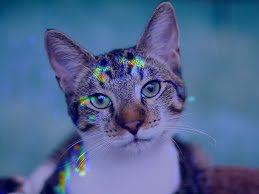

In [42]:
predict_and_display('download1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1 dog


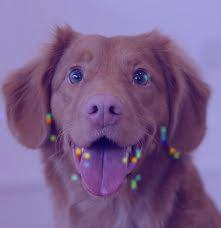

In [43]:
predict_and_display('download2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1 dog


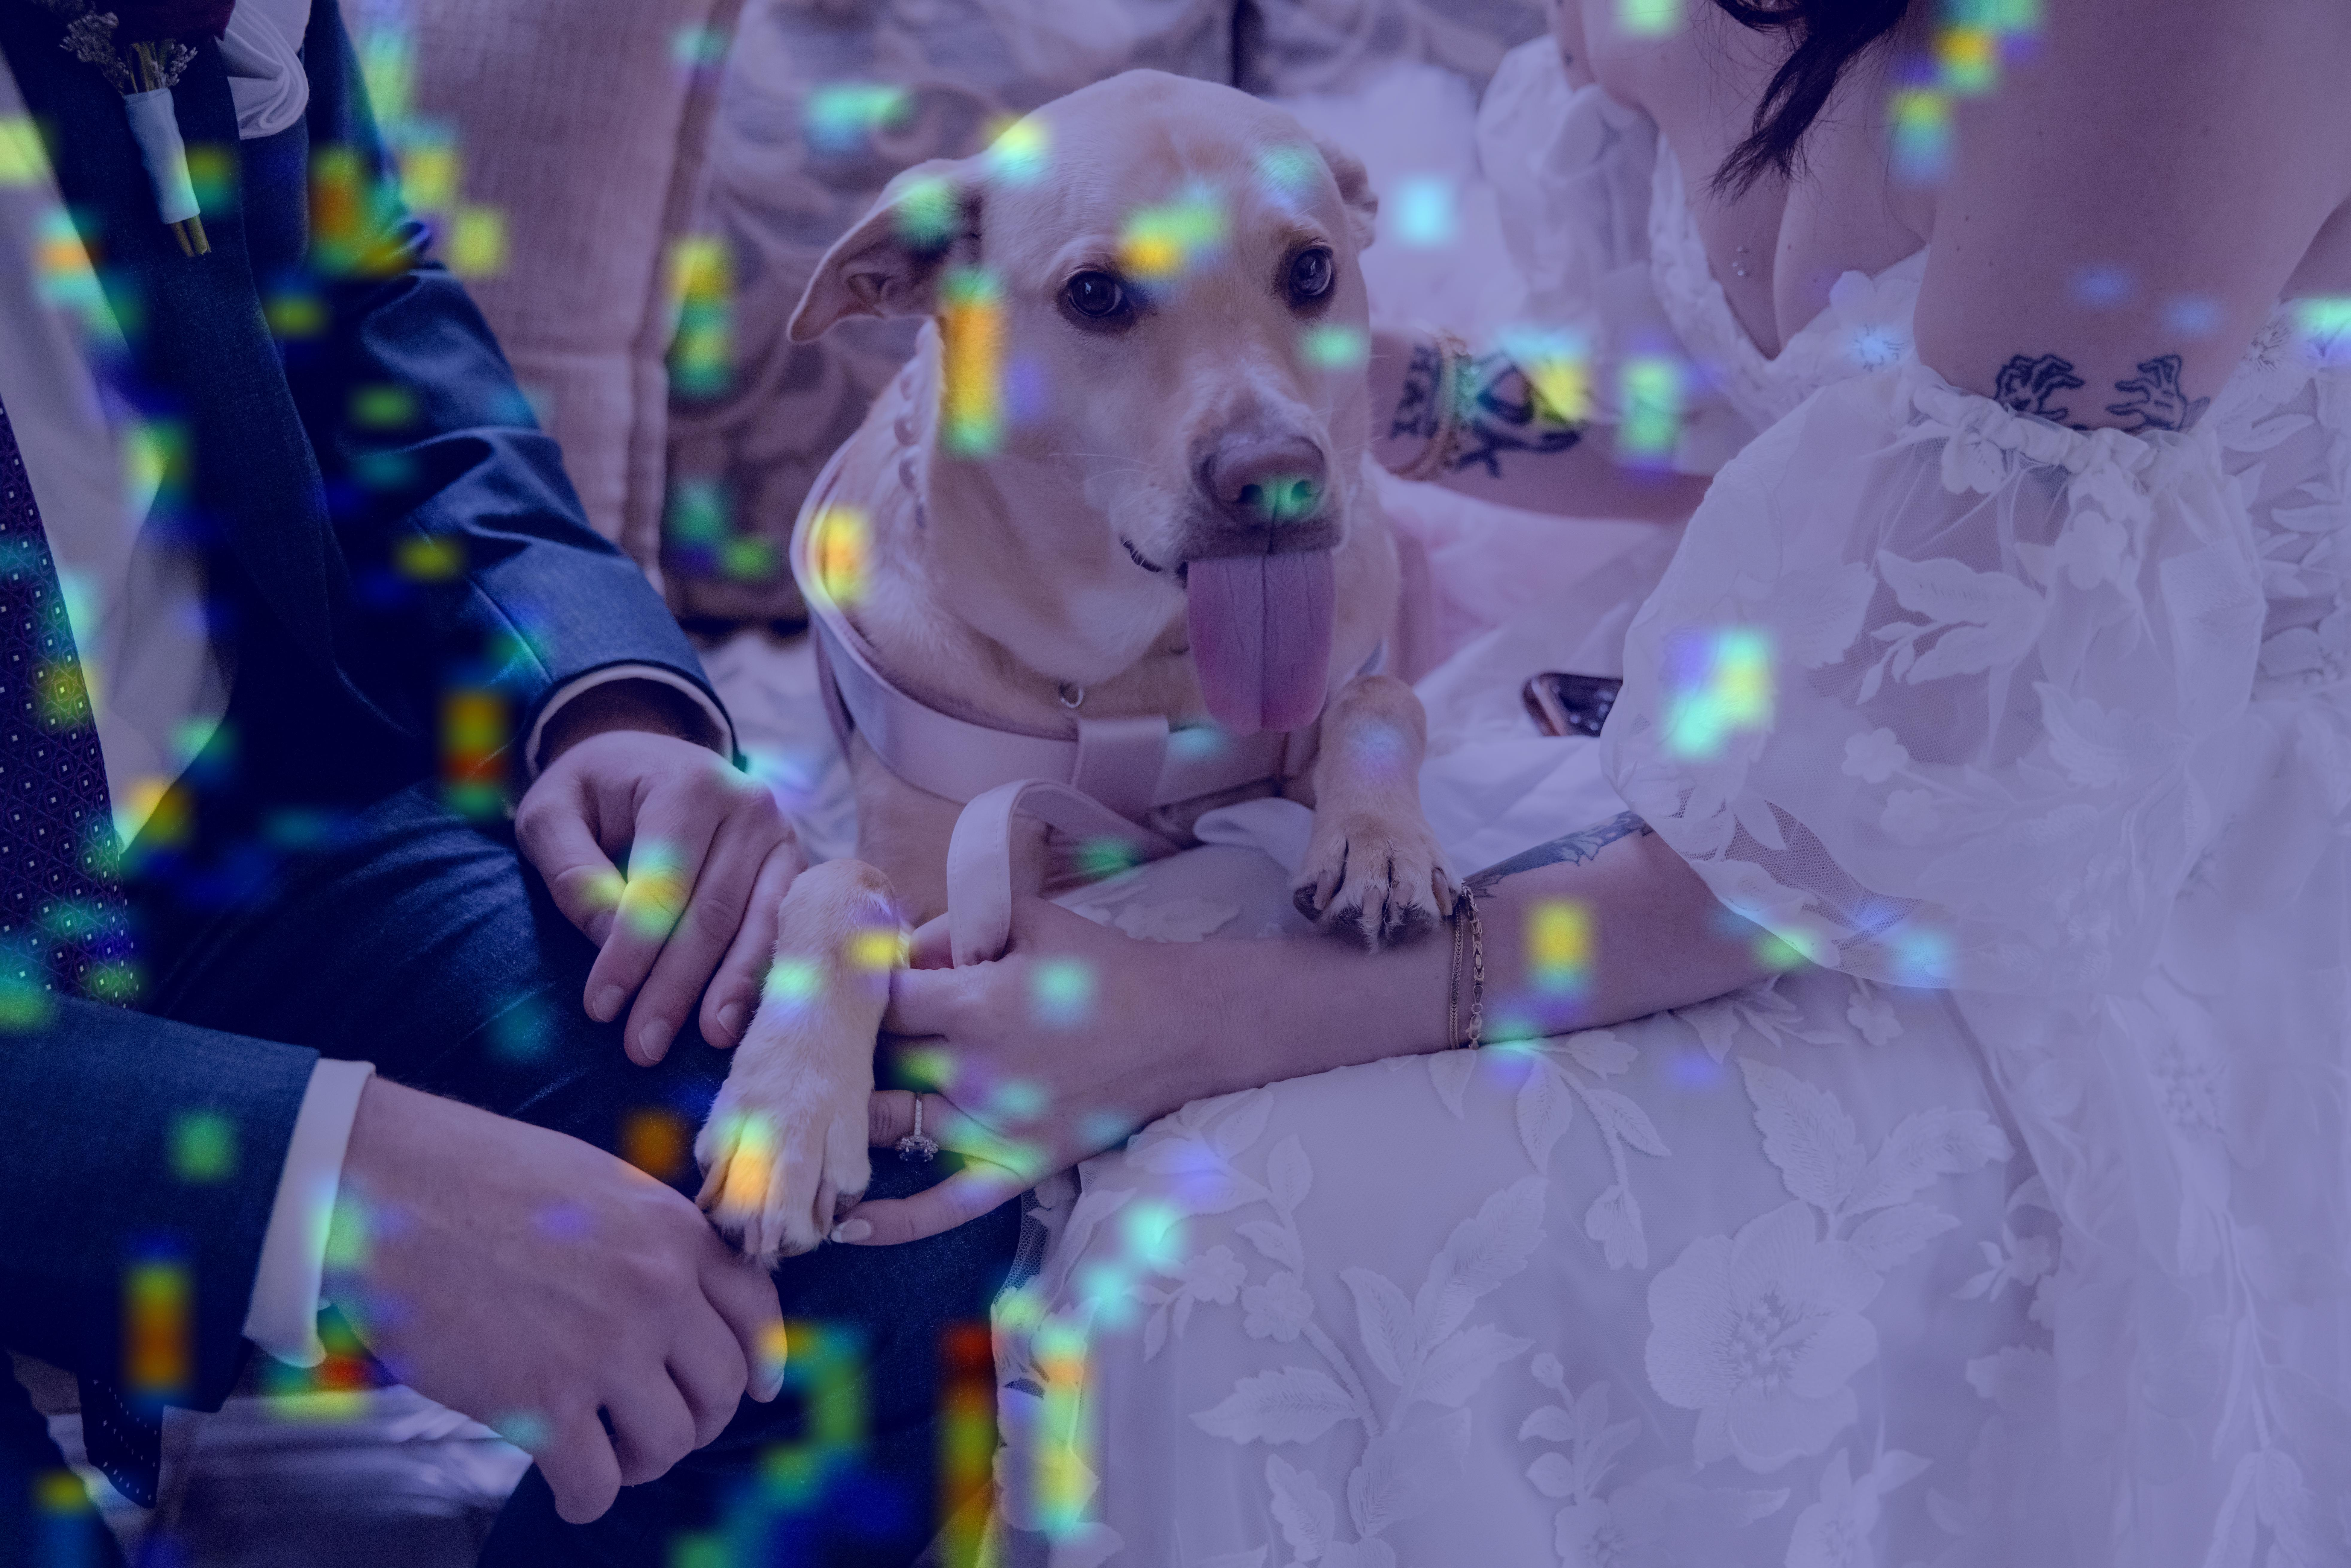

In [49]:
predict_and_display('DaisyAtTheWedding.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
0 cat


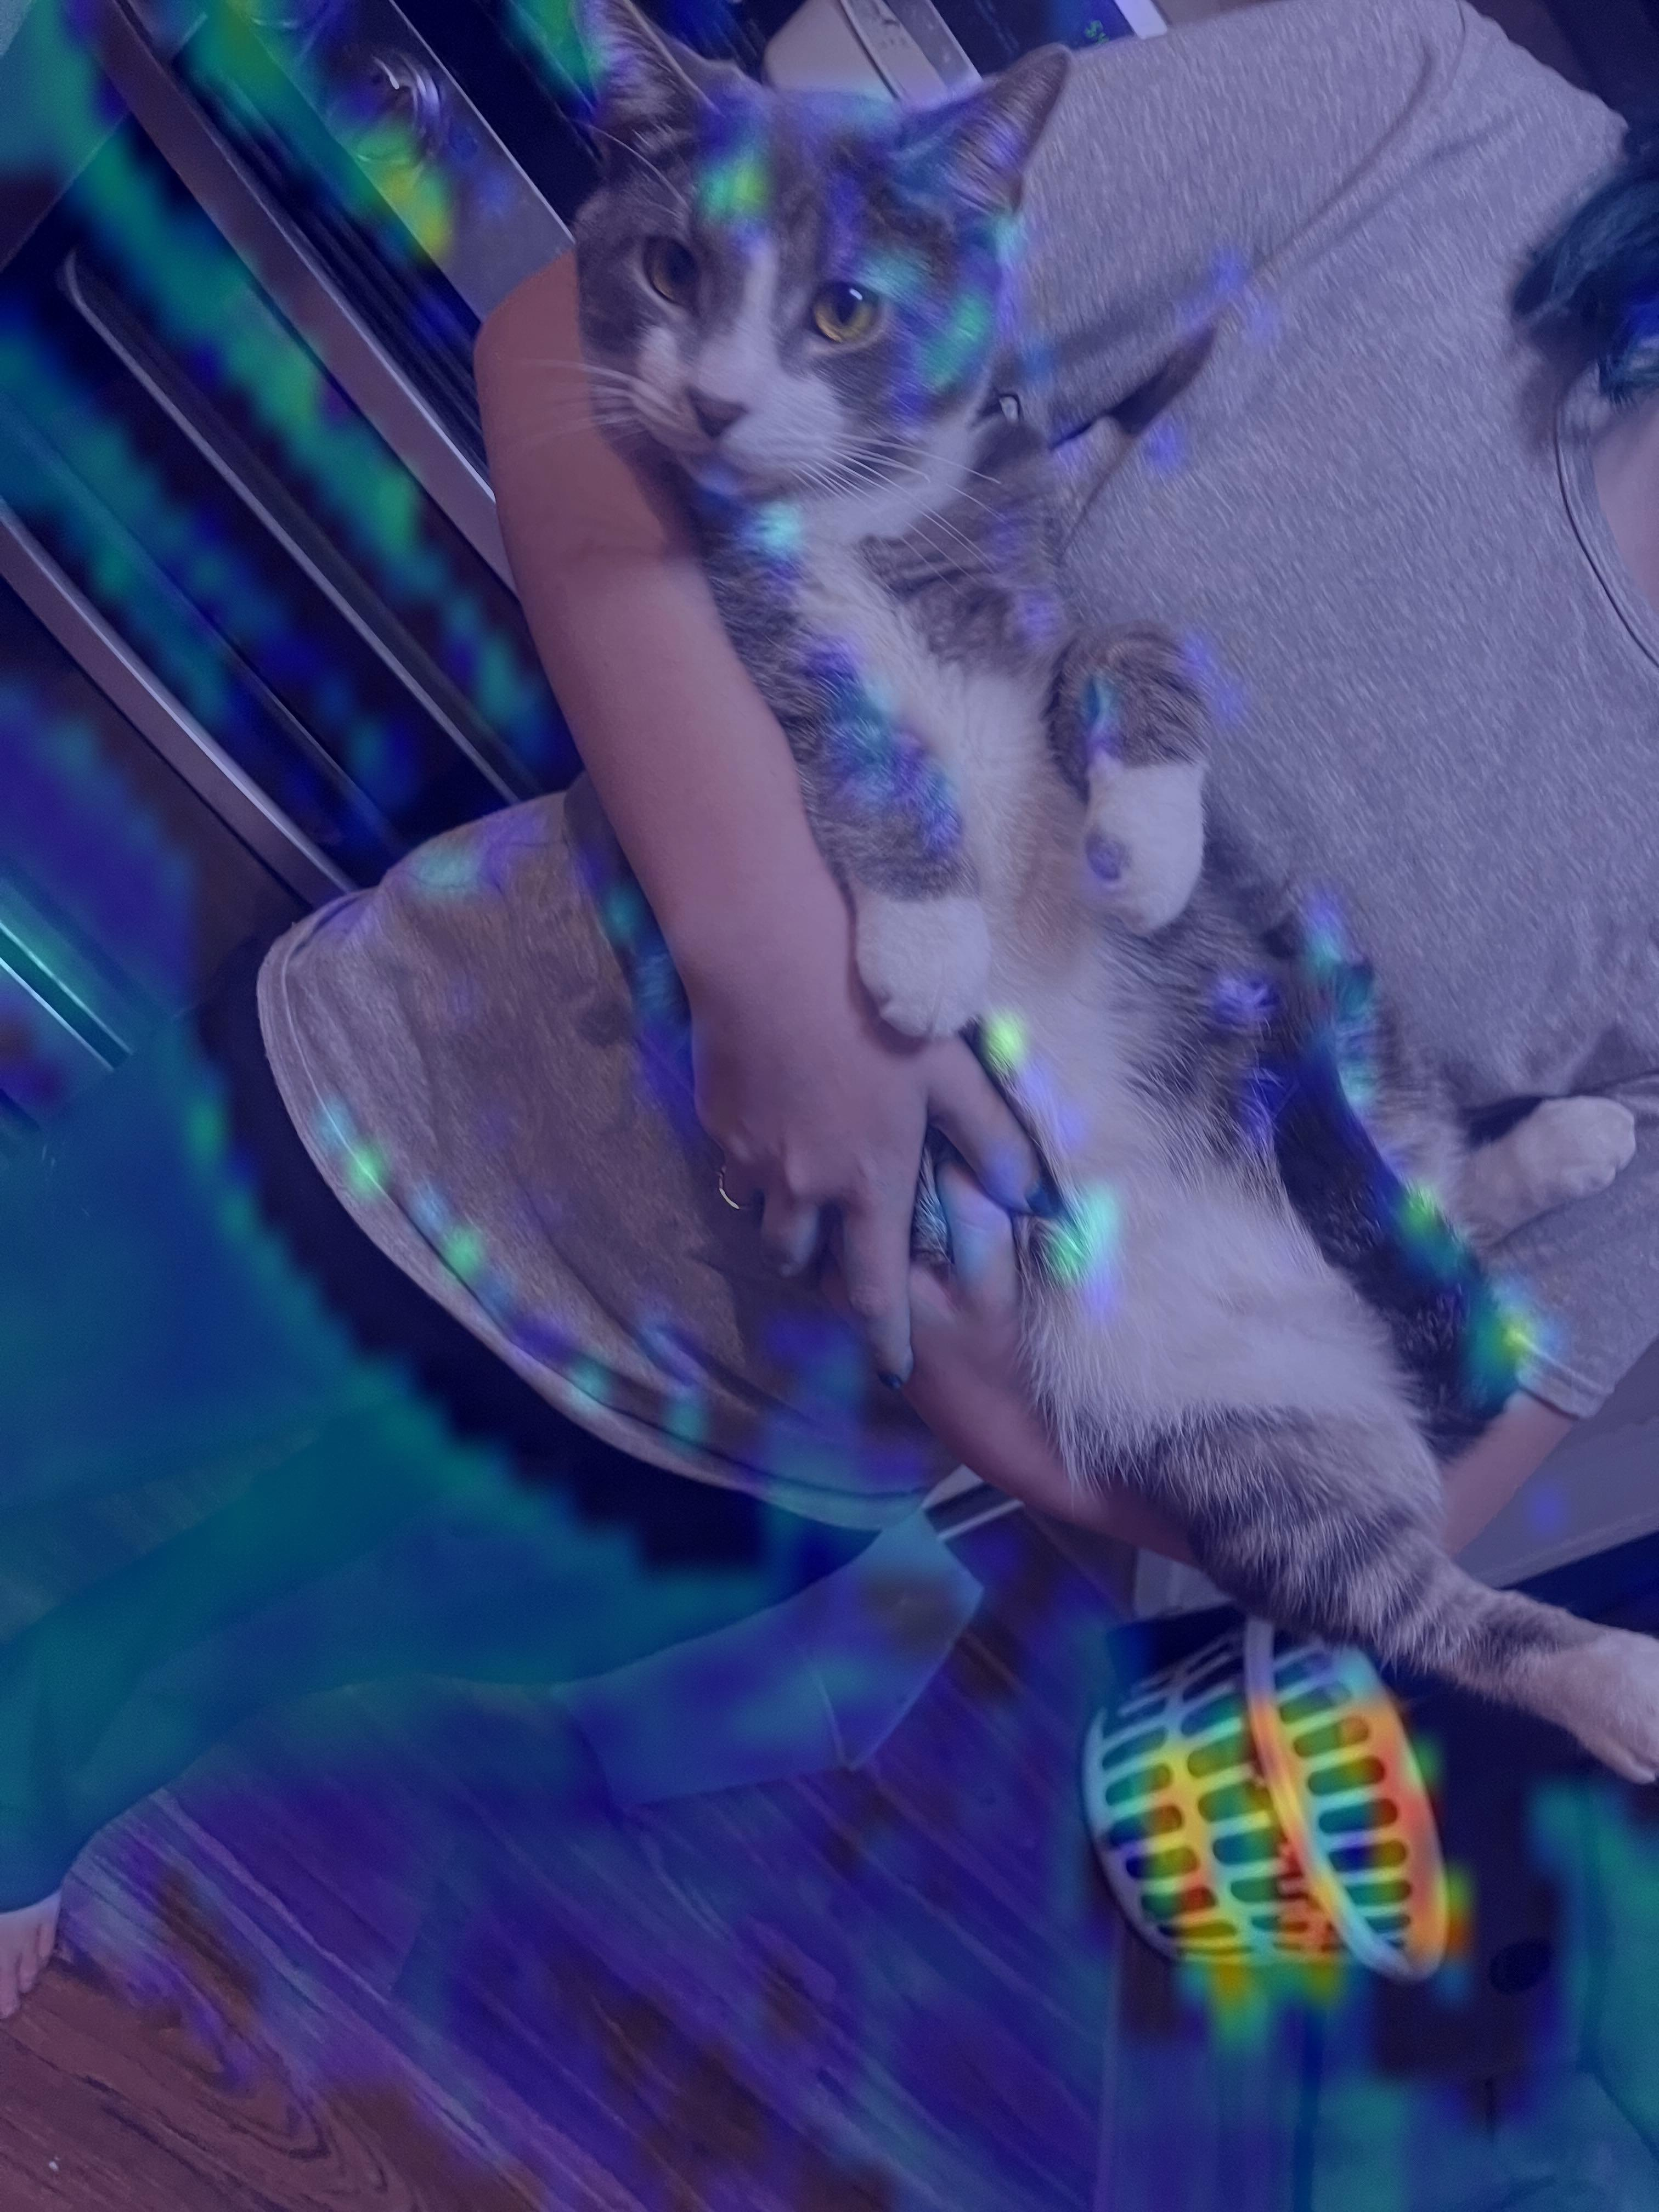

In [50]:
predict_and_display('cat.jpg')